## Q1. Write a Python function that takes a list of words as input and return a string with unique words separated by `,`.(**15 marks**)
`Example Input: ["apple", "banana", "apple", "orange", "banana", "grape"]`

`Example Output: "apple, banana, orange, grape"`

In [1]:
def unique_words_to_string(words):
    unique_words = set(words)
    
    sorted_unique_words = sorted(unique_words)
    
    result = ", ".join(sorted_unique_words)
    
    return result

In [2]:
input_words = ["apple", "banana", "apple", "orange", "banana", "grape"]
output = unique_words_to_string(input_words)
print(output)

apple, banana, grape, orange


## Q2. Create a Python function that takes a number `n` as input, output an `n*n` numpy array with elements on the diagonal  0s, others are 1s. (**10 marks**)

`Example Input: 4`

`Example Output: [[0 1 1 1]
[1 0 1 1]
[1 1 0 1]
[1 1 1 0]]`

In [3]:
import numpy as np

In [4]:
def eye_matrix(n):
    matrix_ones = np.ones((n, n))
    for i in range(n):
        matrix_ones[i, i] = 0
    print(matrix_ones)

In [5]:
n = 4
eye_matrix(n)

[[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]


## Q3. Write a Python function that takes  a list of numerical values and integer `n` as inputs, plot a relative frequency histogram with `n` bins, to visualize their distribution. (**15 marks**)
`Example Input: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5]`

`Example output (labels and the title are not mandatory):`

![Alt text](example.png "Optional title")

In [6]:
import matplotlib.pyplot as plt

In [7]:
def freq_hist(data, n_bins):
    plt.hist(data, bins=n_bins, density=True, alpha=0.7, edgecolor='black')

    plt.xlabel('Value')
    plt.ylabel('Relative Frequency')
    plt.title(f'Relative Frequency Histogram')
    plt.ylim(0,0.35)
    plt.show()

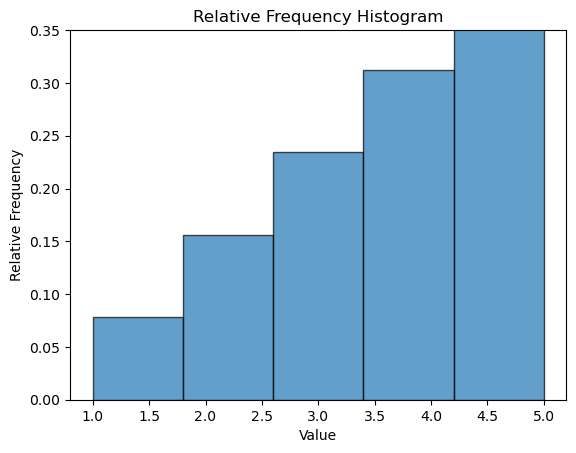

In [8]:
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5]
n_bins = 5
freq_hist(data, n_bins)

## Please download `lung_cancer_prediction_dataset.csv` from Moodle and Q4 to Q10 are based on this dataset

## Q4. Write Python program to implement the functions below (15 marks): 

1. Load the `lung_cancer_prediction_dataset.csv` into a dataframe (**2 marks**)
2. Check if any missing values in the dataframe (**5 marks**)
3. Count the number of zero values in `Survival_Years` and fill in zero values in the `Survival_Years` by `"Not applicable"` (**8 marks**)

In [9]:
import pandas as pd

In [10]:
data = pd.read_csv('lung_cancer_prediction_dataset.csv')
data.head()

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


In [11]:
data.isnull().values.any()

True

In [12]:
data["Survival_Years"].value_counts()

Survival_Years
0     211671
10       925
6        924
5        922
1        905
7        896
2        888
4        888
3        873
8        871
9        869
Name: count, dtype: int64

In [13]:
data["Survival_Years"] = data["Survival_Years"].replace({0: "Not applicable"})

In [14]:
data["Survival_Years"].value_counts()

Survival_Years
Not applicable    211671
10                   925
6                    924
5                    922
1                    905
7                    896
2                    888
4                    888
3                    873
8                    871
9                    869
Name: count, dtype: int64

## Q5. Write Python program to implement the following tasks. (**10 marks**)
1. Count the number of each unique item in `Air_Pollution_Exposure` and `Occupational_Exposure` columns (**4 marks**)
2. Create a new dataframe that contains dummy variables for both the `Air_Pollution_Exposure` and `Occupational_Exposure` columns. (**6 marks**)

In [15]:
data["Air_Pollution_Exposure"].value_counts()

Air_Pollution_Exposure
Medium    110157
Low        55367
High       55108
Name: count, dtype: int64

In [16]:
data["Occupational_Exposure"].value_counts()

Occupational_Exposure
No     154115
Yes     66517
Name: count, dtype: int64

In [17]:
one_hot_air = pd.get_dummies(data["Air_Pollution_Exposure"], prefix="Air_Pollution_Exposure")
one_hot_occ = pd.get_dummies(data["Occupational_Exposure"], prefix="Occupational_Exposure")

one_hot_air = pd.DataFrame(one_hot_air)
one_hot_occ = pd.DataFrame(one_hot_occ)

combined_df = one_hot_air.join(one_hot_occ)

combined_df.head()

,Air_Pollution_Exposure_High,Air_Pollution_Exposure_Low,Air_Pollution_Exposure_Medium,Occupational_Exposure_No,Occupational_Exposure_Yes
0,False,True,False,False,True
1,False,True,False,False,True
2,False,False,True,True,False
3,False,True,False,True,False
4,False,False,True,False,True


## Q6. Write Python program to finish the following tasks. (10 marks)
1. Calculate the average age of smokers and non-smokers in the dataset. (**5 marks**)
2. Create a pivot table to show the average age of people with different gender and different lung cancer diagnosis status. (**5 marks**)

In [18]:
data[data["Smoker"] == "Yes"]["Age"].mean()

52.57383321447573

In [19]:
data[data["Smoker"] == "No"]["Age"].mean()

52.48130258294215

In [20]:
pivot_table = data.pivot_table(index=["Gender", "Lung_Cancer_Diagnosis"], values="Age", aggfunc="mean")
print(pivot_table)

                                    Age
Gender Lung_Cancer_Diagnosis           
Female No                     52.506939
       Yes                    53.160650
Male   No                     52.517479
       Yes                    52.327082


## Q7. Standardize the `Age` column (mean=0 and standard deviation=1) for Male individuals whose ages are between 30 and 50 years old, including both 30 and 50. (10 marks)

In [21]:
from sklearn import preprocessing

In [22]:
mask = (data["Gender"] == "Male") & (data["Age"] >= 30) & (data["Age"] <= 50)

masked_data_ages = data[mask][["Age"]]

scaler = preprocessing.StandardScaler()
standardized_ages = scaler.fit_transform(masked_data_ages)

data["Age"] = data["Age"].astype(float)

data.loc[mask, "Age"] = standardized_ages.flatten()

data.head(10)

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80.000000,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53.000000,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,1.160334,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39.000000,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44.000000,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0
5,5,India,1380,54.000000,Female,No,0,0,No,No,...,High,No,No,Poor,No,NaN,Developing,70000,1.95,0.0
6,6,Mexico,128,60.000000,Female,No,0,0,No,Yes,...,Medium,No,No,Poor,No,NaN,Developing,28000,2.34,0.0
7,7,Iran,84,74.000000,Female,No,0,0,Yes,No,...,Low,No,No,Poor,Yes,NaN,Developing,27000,1.12,0.0
8,8,Myanmar,54,-1.315965,Male,Yes,37,29,No,No,...,Low,No,Yes,Poor,No,NaN,Developing,21197,0.60,0.0
9,9,Ethiopia,120,29.000000,Female,No,0,0,No,Yes,...,Medium,No,No,Poor,No,NaN,Developing,18000,0.71,0.0


## Q8. Plot the frequency for `Air_Pollution_Exposure` in `Developing` regions. (5 marks)

Text(0.5, 1.0, 'Frequency Distribution of Air Pollution Exposure in Developing Regions')

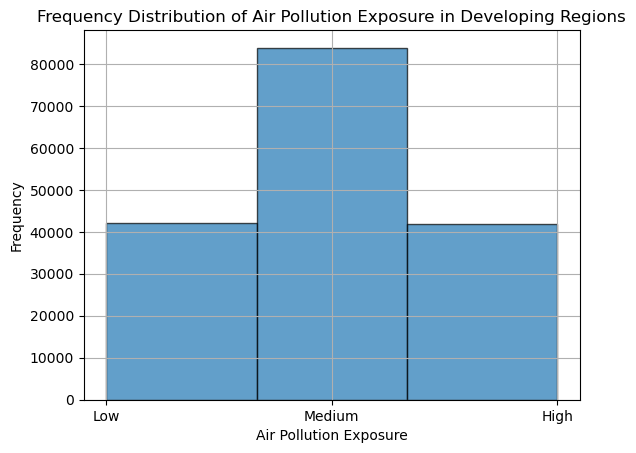

In [23]:
mask_2 = data["Developed_or_Developing"] == "Developing"
data[mask_2]["Air_Pollution_Exposure"].hist(bins=3, edgecolor='black', alpha=0.7)
plt.xlabel("Air Pollution Exposure")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Air Pollution Exposure in Developing Regions")

## Q9. Apply min-max normalization to `Annual_Lung_Cancer_Deaths` and plot a boxplot for `Annual_Lung_Cancer_Deaths` by grouping the subjects based on their `Healthcare_Access`.  (**5 marks**)

In [24]:
z_scaler = preprocessing.MinMaxScaler()

data["Annual_Lung_Cancer_Deaths"] = scaler.fit_transform(data[["Annual_Lung_Cancer_Deaths"]])
data.head(10)

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80.000000,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,4.790494,2.44,0.0
1,1,Iran,84,53.000000,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,-0.282586,2.10,0.0
2,2,Mexico,128,1.160334,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,-0.274934,1.11,0.0
3,3,Indonesia,273,39.000000,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,-0.183114,0.75,0.0
4,4,South Africa,59,44.000000,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,-0.374406,2.44,0.0
5,5,India,1380,54.000000,Female,No,0,0,No,No,...,High,No,No,Poor,No,NaN,Developing,0.046438,1.95,0.0
6,6,Mexico,128,60.000000,Female,No,0,0,No,Yes,...,Medium,No,No,Poor,No,NaN,Developing,-0.274934,2.34,0.0
7,7,Iran,84,74.000000,Female,No,0,0,Yes,No,...,Low,No,No,Poor,Yes,NaN,Developing,-0.282586,1.12,0.0
8,8,Myanmar,54,-1.315965,Male,Yes,37,29,No,No,...,Low,No,Yes,Poor,No,NaN,Developing,-0.326989,0.60,0.0
9,9,Ethiopia,120,29.000000,Female,No,0,0,No,Yes,...,Medium,No,No,Poor,No,NaN,Developing,-0.351451,0.71,0.0


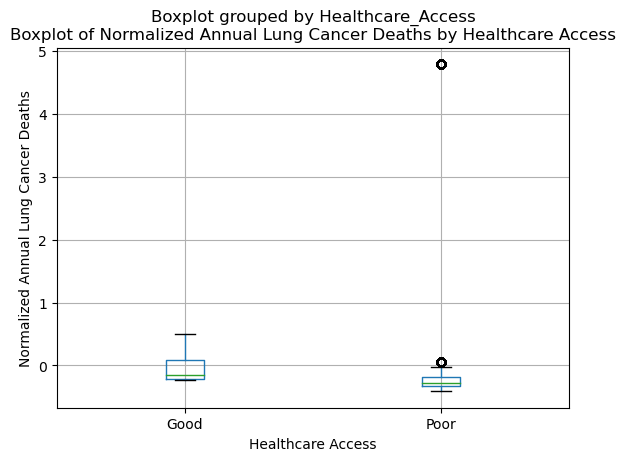

In [25]:
grouped_data = data[["Healthcare_Access", "Annual_Lung_Cancer_Deaths"]]

grouped_data.boxplot(by="Healthcare_Access")

plt.xlabel("Healthcare Access")
plt.ylabel("Normalized Annual Lung Cancer Deaths")
plt.title("Boxplot of Normalized Annual Lung Cancer Deaths by Healthcare Access")

plt.show()

## Q10. Plot the total number of `Annual_Lung_Cancer_Deaths` for different `Country` and `Gender` combinations (**5 marks**)

In [26]:
filtered_df = data[["Annual_Lung_Cancer_Deaths", "Country", "Gender"]].groupby(["Country", "Gender"]).count()
filtered_df = filtered_df.reset_index()
filtered_df

,Country,Gender,Annual_Lung_Cancer_Deaths
0,Bangladesh,Female,4445
1,Bangladesh,Male,4376
2,Brazil,Female,4425
3,Brazil,Male,4375
4,China,Female,4400
5,China,Male,4507
6,DR Congo,Female,4421
7,DR Congo,Male,4440
8,Egypt,Female,4448
9,Egypt,Male,4374


In [27]:
pivot_df = filtered_df.pivot(index='Country', columns='Gender', values='Annual_Lung_Cancer_Deaths')
pivot_df

Gender,Female,Male
Country,,
Bangladesh,4445,4376
Brazil,4425,4375
China,4400,4507
DR Congo,4421,4440
Egypt,4448,4374
Ethiopia,4493,4482
France,4425,4495
Germany,4357,4370
India,4360,4392


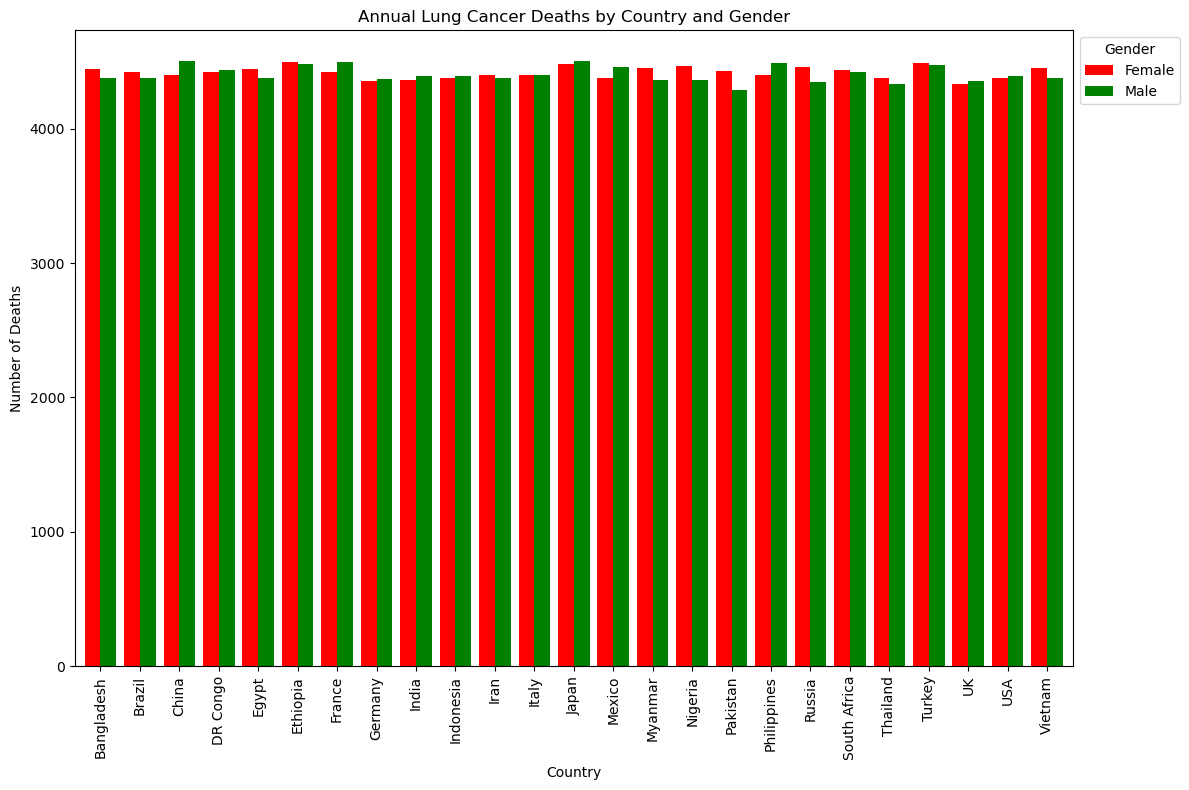

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))

pivot_df.plot(kind='bar', ax=ax, color={'Male': 'green', 'Female': 'red'}, width=0.8)

ax.set_title('Annual Lung Cancer Deaths by Country and Gender')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Deaths')
plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()